$1)$ Dynamic Programming

Consider the stationary deterministic Asset accumulation
$$\max_{c_t}\sum_{t=0}^{\infty}β^tu(c_t)$$
$$s.t. \hspace{0.5cm} a_{t+1}=a_t+ra_t-c_t$$
$$a_0 \hspace{0.5cm} given $$
$$\lim_{t\to\infty}e^{-rt}a_t$$
in Dynamic programming form
$$V(a)=\max_{a'}\left\{{u(\underbrace{ (1+r)a-a' }_{c} )}+\beta V(a')\right\} \hspace{0.5cm} \forall a$$

The state variable is the value of asset today $a$ while the control variable is the asset value tomorrow $a'$ where we assume
$$u=\frac{c^{1-\gamma}}{1-\gamma}; \hspace{0.5cm} \gamma \leq1$$
$$\beta <1; \hspace{0.5cm}\beta<\frac{1}{1+r} $$

with $\gamma \in [0,1]$ and $\beta \in [0,1)$

Assume Further for simplicity that assets can not be negative and assets take the following possible values
$\left[ a_0, a_1, ... a_{ns}\right]$
where $ns$ is the number of possible states and $a_0 = 0$.


$a)$ Write the problem in term of value function iteration, and briefly discuss why your
iterative problem is bound to convergence to the stationary problem of the first equation.
In other words, discuss why iteration over $V_j$ ensures converge to a unique $V$

In order to rewrite the problem in term of value function iteration we can firstly consider the change of variable where $a\to a_t $ and $a' \to a_{t+1}$.

Let's call $V(a)$ as follows: $$V_t(a_t)=\max_{a_{t+1}}\left\{{u(\underbrace{ (1+r)a_t-a_{t+1} }_{c_t} )}+\beta V_{t+1}(a_{t+1})\right\}$$

Exploiting the “contraction mapping theorem”, which states that if utility is bounded, continuous, strictly increasing and strictly concave iterations on equation above from an arbitrary initial value causes $V$ to converge as the number of iterations become large.

In our case $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$ is bounded and continuos for $\forall \gamma : 0<\gamma<1$ 
If we consider the first derivative and being c strictly $c>0$ we can show utility is strictly increasing:
$$u'(c)=\frac{(1-\gamma)c^{-\gamma}}{(1-\gamma)}=c^{-\gamma}>0 \hspace{0.5cm}\forall \gamma : 0<\gamma<1 $$
To show u() concavity:
$$u''(c)=-\gamma c^{-\gamma-1}<0 \hspace{0.5cm}\forall \gamma : 0<\gamma<1   $$

alternatively, we can think about an important theorem of the book "a first pass on numerical methods":


*Consider the cake easting problem with infinite horizon.  Assume that $\beta \in (0,1)$ and that the term $\sum_{t=0}^{\infty} \beta^t u(c_t)$ exists and is finite for any feasible path $(a_t)_t$ given $a_0$ Then there is a unique solution to the dynamic optimization
problem 11.1.4.*

We can apply this theorem for this modified version of the cake eating problem (here the cake size increases by time) assuming that consumption at any time t is finite, i.e. the capital accumulation cannot be infinite from one year to the other.

An important remark is that we allow c to belong to the interval $(0,+\infty)$ hence we can say that $u(c)$ is bounded from below. This is needed in the following steps.

We want to obtain the value function V through an iterative tecnhique. Starting from an initial guess $V_0$ we aim to obtain a convergent sequence of value functions over time.
In practice, let us start by setting $V_0 (a_1) = 0$ obtain $$V_{1} (a_2) = \max\limits_{a_1}  u((1+r)a_0-a_1)$$ 
Compute the first order condition of the maximization problem and obtain $a_{1}*$
We are ready to go to the next step of the iteration, i.e. we are going to compute $$V_2 (a_3) = \max\limits_{a_2}  u((1+r)a_1-a_2) + \beta V_2(a_1)$$
where $a_1$ is the optimal value obtained at the previous step.
We proceed in this way until the distance between two consecutive value function is small enough 
more precisly, given a distance function $d : VxV \to \mathbb{R} $ we stop the iteretion when $d(V_t,V_{t+1}) < \epsilon$ where $\epsilon$ represents the tollerance level decided by us.


$b)$  Assign specific (and reasonable) values to the parameters of the model

In [1]:
a_0 = 1
r = 0.08 #capital accumulation rate
beta = 0.95  #a very patient individual
gamma = 0.45 #risk adverse individual
a0=0
T=100
ns=100

$c)$ Carefully define the set of feasible control $\vec{a'}$ for any given level of the state space.

In order to define a set of possible $\vec{a'}$ for any level of the state space we nedd to consider that $a_{t+1}=a_t+ra_t-c_t$ and thus $c_t=a_t(1+r)-a_{t+1}>0 \to a_{t+1}<(1+r)a_t$ where $1+r<\frac{1}{\beta}$

The level of capital that the agent plans to have the following year cannot be negative (i.e. he cannot borrow) and cannot be larger than the level of capital in case of no consumption during the year, hence each element of the vector $\vec{a'}$ = $[a_1, a_2,...]$ must lie in the interval $(0,a_0 (1+r)^t]$ for $t = 1,2,...$

In [2]:
def feasible_actions(x):
    # Correspondence of feasible actions
    # For each index x of today's cake, return a range of feasible actions
    # Feasible actions range from 0 up to but not including (1 + r) * a
    return range(int((1 + r) * x))


$d)$ Form a grid of the state space $\vec{a}$, where $\vec{a}$ is n x 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import fminbound
from scipy import interp

min_grid = 1.e-6
max_grid = 2

a_= np.linspace(min_grid, max_grid, ns)

(e) Write down a python code of a value function iteration with discretization of the
state space and finds the unique discrete approximation to
$$\vec{V}(\vec{a}) ≈ V (a)$$


In [4]:
def U(c):
    # Utility function
    # Calculate the utility value for a given consumption level 'c'
    return c**(1 - gamma) / (1 - gamma)

dimIter = 1000
T_v = np.zeros((len(a_), dimIter))
# Initialize a matrix to store the value function values for each iteration

for i in range(dimIter - 1):
    aux = np.zeros((len(a_), len(a_))) - 1
    # Initialize a matrix to store the intermediate values for each state-action pair
    
    for j in range(len(a_)):
        for jj in range(len(a_)):
            if a_[j] * (1 + r) >= a_[jj]:
                # Check if the current action is feasible based on the current state and interest rate
                aux[j, jj] = U((1 + r) * a_[j] - a_[jj]) + beta * T_v[j, i]
                # Calculate the value for the state-action pair and store it in the 'aux' matrix
    
    T_v[:, i + 1] = np.amax(aux, axis=1)
    # Update the value function values for the next iteration by taking the maximum value for each state

tol = 1e-6
conv = 0
kk = 1

while conv == 0:
    vold = T_v[:, kk - 1]
    vnew = T_v[:, kk]
    target = abs(max(vnew - vold))
    # Calculate the maximum difference between the value function values of consecutive iterations

    if target < tol:
        print("Convergence reached in", kk - 1, "iterations.")
        vadda = vold
        conv = 1
        kkst = kk - 1
        # Convergence criteria met, store the value function values and mark convergence
        
    else:
        kk = kk + 1
        print(target)
        # Not converged yet, continue to the next iteration
        
    if kk == dimIter:
        conver = 2
        print("No convergence reached.")
        # Maximum number of iterations reached, mark convergence as not reached


2.7770695917535946
2.6382161121659147
2.5063053065576186
2.3809900412297385
2.2619405391682506
2.1488435122098384
2.041401336599348
1.9393312697693794
1.842364706280911
1.7502464709668644
1.6627341474185222
1.5795974400475963
1.5006175680452145
1.4255866896429552
1.354307355160806
1.2865919874027654
1.2222623880326289
1.161149268630993
1.1030918051994476
1.0479372149394734
0.9955403541924994
0.9457633364828766
0.898475169658731
0.8535514111757934
0.8108738406170062
0.7703301485861545
0.7318136411568474
0.6952229590990058
0.660461811144053
0.6274387205868521
0.5960667845575074
0.566263445329632
0.5379502730631529
0.5110527594099921
0.48550012143949317
0.46122511536751887
0.4381638595991433
0.4162556666191861
0.39544288328822574
0.3756707391238123
0.35688720216762704
0.33904284205924284
0.32209069995628425
0.305986164958469
0.2906868567105434
0.2761525138750187
0.2623448881812678
0.2492276437722012
0.2367662615835897
0.22492794850441555
0.2136815510791905
0.20299747352522957
0.1928475998

$f)$ Plot the value function and the control function with respect to the state space.

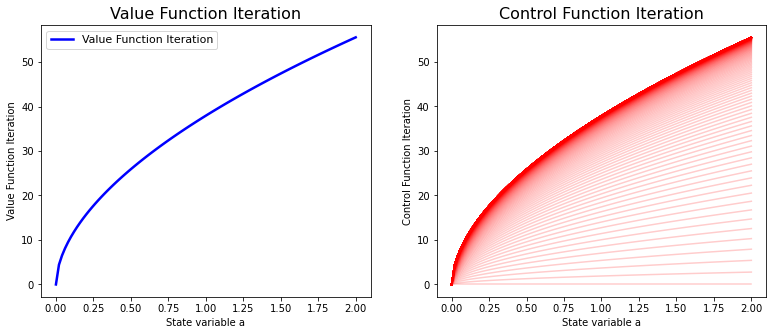

In [5]:
%matplotlib inline 
fig, (ax, ax2) = plt.subplots(1, 2)

ax.plot(a_, vadda, 'b', label='Value Function Iteration', linewidth=2.5)
ax.set_ylabel('Value Function Iteration', fontsize=10)
ax2.set_ylabel("Control Function Iteration", fontsize=10)
ax.set_xlabel('State variable a', fontsize=10)
ax2.set_xlabel('State variable a', fontsize=10)
ax.legend(loc='best', fontsize=11)

ax.set_title(r'Value Function Iteration', fontsize=16)
ax2.set_title(r"Control Function Iteration", fontsize=16)

for zz in range(kkst - 1):
    ax2.plot(a_, T_v[:, zz], 'r', alpha=0.2)
    # Plot the value function values for each iteration
#ax2.plot(label='Control Function Iteration')

fig.set_figheight(5)
fig.set_figwidth(13)



Text(0.5, 1.0, 'Policy Function')

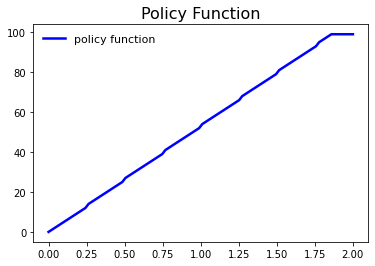

In [6]:
%matplotlib inline  
auxsig =np.zeros((len(a_), len(a_)))-1
for j in range(len(a_)):
    for jj in range(len(a_)):
        if a_[j]*(1+r) >= a_[jj]:
            auxsig[j, jj] = U(a_[j]*(1+r)-a_[jj])+beta*vadda[jj]
    # for each row the value of state variable corresponding to the maximum         
    sigadda = np.argmax(auxsig, axis=1)
    opk = a_[sigadda]
    
fig, ax = plt.subplots()
ax.plot(a_, sigadda, 'b-',label='policy function',linewidth=2.5)
ax.legend(loc='upper left', frameon=False, fontsize=11)
ax.set_title(r'Policy Function', fontsize=16)


__Exercise 2__

Shooting Method: Consider the following dynamic Ramsey model. Note that this
exercise is not compulsory and it is for the bored student in search for bonus point.

$$
Max_{c_t, k_{t+1}}= \Biggr[\sum_{t=0}^{\infty} \beta^t \ \frac{c_t^{1-\gamma}}{1-\gamma} \Biggr]\\
$$

$$
k_{t+1}=k^\alpha_t - c_t \ ; \ t=0,1,2,...T
$$

$k_0$ is given

all symbols have the usual mining

$a)$ Set up the finite horizon Lagrangean and take the first order condition, and obtain
a non linear system of $2$ equations in $kt$, $ct$ and a Khun-Tucker condition for the non negative constraint.

To set up the finite horizon Lagrangean and obtain the first-order condition, we have the following non-linear system of equations involving the variables $c_t$, $k_{t+1}$, and the Lagrange multiplier $\lambda_t$:

1. From the Lagrangian function:
\begin{equation}
\mathcal{L}(c_t, k_{t+1}, \lambda) = \sum_{t=0}^T \beta^t \frac{c_t^{1-\gamma}}{1-\gamma} + \sum_{t=0}^T \lambda_t \left(k_t^\alpha - c_t - k_{t+1} \right)
\end{equation}

2. First equation:
\begin{equation}
\beta^t c^{-\gamma} = \lambda_t
\end{equation}

3. Second equation:
\begin{equation}
-\lambda_t + \lambda_{t+1} \alpha k_{t+1}^{\alpha -1} = 0
\end{equation}

4. Third equation:
\begin{equation}
k_t^\alpha - c_t - k_{t+1} = 0
\end{equation}

5. Karush-Kuhn-Tucker (KKT) condition for non-negativity constraint and terminal condition:
\begin{equation}
\lambda_T k_{t+1} = 0
\end{equation}

\begin{equation}
  \left\{
    \begin{aligned}
      & \beta^tc^{-\gamma}=\lambda_t\\
      & \alpha k_{t+1}^{\alpha-1}=\frac{\beta^t c^{-\alpha}}{\beta^{t+1}c_{t+1}^{\gamma}}\\
      & k_t^\alpha - c_t = k_{t+1}  \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}

\begin{equation}
  \left\{
    \begin{aligned}
          & c_{t+1}^{-\gamma} = \frac{c_t^{-\gamma}}{ \beta \alpha k_{t+1}^{\alpha -1} }\\
      &  k_t^\alpha - c_t = k_{t+1} \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}


Simplifying the system of equations, we have the following alternative representations:

Alternative representation :

\begin{equation}
  \left\{
    \begin{aligned}
      &  c_{t+1}=c_t(\alpha \beta k_{t+1}^{\alpha-1})^{\frac{1}{\gamma}}\\
      &  k_t^\alpha - c_t = k_{t+1} \\
      & \lambda_T k_{t+1} = 0 
    \end{aligned}\\
  \right.
\end{equation}


$b)$ Assume $α$ = $0.33$, $β$ = $0.98$, $γ$ = $.5$, and write a Python Code for solving the
system of difference equation with the Shooting method when $T$ = $50$, $T$ = $60$, .....

## Pay attention

In the following codes I will procede by imposing T=10 because for an hig value of T (such as 50,60) the plots of capital and consumption go crazy !

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from numba import njit, float64
from numba.experimental import jitclass
import numpy as np

In [8]:
planning_data = [
    ('γ', float64),    # Coefficient of relative risk aversion
    ('β', float64),    # Discount factor
    ('δ', float64),    # Depreciation rate on capital ----> by imposing it =1 it will erase after
    ('α', float64),    # Return to capital per capita
    ('A', float64)     # Technology -----> same story than δ
]

In [9]:
# Define the jitclass specification
planning_data = [
    ('γ', float64),   # Parameter γ for utility function
    ('β', float64),   # Parameter β for discount factor
    ('δ', float64),   # Parameter δ for depreciation rate
    ('α', float64),   # Parameter α for production function
    ('A', float64)    # Parameter A for production function
]

@jitclass(planning_data)
class PlanningProblem():

    def __init__(self, γ=0.5, β=0.98, δ=1, α=0.33, A=1):
        '''
        Initializes the PlanningProblem class with given parameters
        '''
        self.γ, self.β = γ, β
        self.δ, self.α, self.A = δ, α, A

    def u(self, c):
        '''
        Utility function
        '''
        γ = self.γ

        return c ** (1 - γ) / (1 - γ) if γ != 1 else np.log(c)

    def u_prime(self, c):
        '''
        Derivative of utility function
        '''
        γ = self.γ

        return c ** (-γ)

    def u_prime_inv(self, c):
        '''
        Inverse of the derivative of the utility function
        '''
        γ = self.γ

        return c ** (-1 / γ)

    def f(self, k):
        '''
        Production function
        '''
        α, A = self.α, self.A

        return A * k ** α

    def f_prime(self, k):
        '''
        Derivative of the production function
        '''
        α, A = self.α, self.A

        return α * A * k ** (α - 1)

    def f_prime_inv(self, k):
        '''
        Inverse of the derivative of the production function
        '''
        α, A = self.α, self.A

        return (k / (A * α)) ** (1 / (α - 1))

    def next_k_c(self, k, c):
        '''
        Given the current capital Kt and an arbitrary feasible
        consumption choice Ct, computes Kt+1 by the state transition law
        and optimal Ct+1 by the Euler equation.
        '''
        β, δ = self.β, self.δ
        u_prime, u_prime_inv = self.u_prime, self.u_prime_inv
        f, f_prime = self.f, self.f_prime

        k_next = f(k) + (1 - δ) * k - c
        c_next = u_prime_inv(u_prime(c) / (β * (f_prime(k_next) + (1 - δ))))

        return k_next, c_next


In [10]:
pp = PlanningProblem()

In [11]:

@njit
def shooting(pp, c0, k0, T=10):
    '''
    Given the initial condition of capital k0 and an initial guess
    of consumption c0, computes the whole paths of c and k
    using the state transition law and Euler equation for T periods.
    '''
    if c0 > pp.f(k0):
        print("Initial consumption is not feasible.")
        return None

    # Initialize vectors of c and k
    c_vec = np.empty(T+1)
    k_vec = np.empty(T+2)

    c_vec[0] = c0
    k_vec[0] = k0

    for t in range(T):
        k_vec[t+1], c_vec[t+1] = pp.next_k_c(k_vec[t], c_vec[t])

    k_vec[T+1] = pp.f(k_vec[T]) + (1 - pp.δ) * k_vec[T] - c_vec[T]

    return c_vec, k_vec

#The code defines a function called shooting which computes the paths of consumption 
#(c_vec) and capital (k_vec) over T periods

In [12]:
paths = shooting(pp, 0.1, 0.2, T=10)

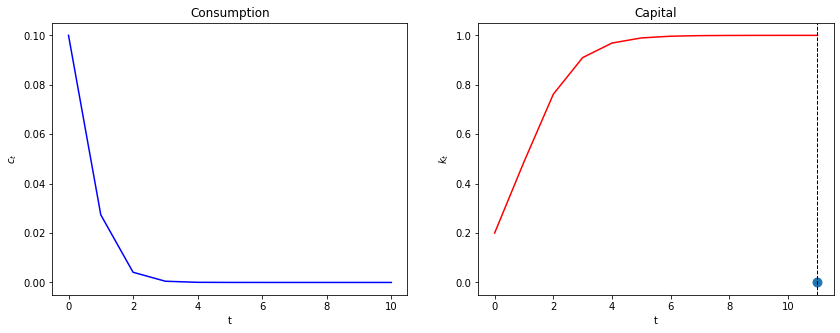

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

T = paths[0].size - 1
for i in range(2):
    axs[i].plot(paths[i], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

axs[1].scatter(T+1, 0, s=80)
axs[1].axvline(T+1, color='k', ls='--', lw=1)

plt.show()

In [14]:
@njit
def bisection(pp, c0, k0, T=60, tol=1e-4, max_iter=500, k_ter=0, verbose=True):

    # initial boundaries for guess c0
    c0_upper = pp.f(k0)
    c0_lower = 0

    i = 0
    while True:
        c_vec, k_vec = shooting(pp, c0, k0, T)
        error = k_vec[-1] - k_ter

        # check if the terminal condition is satisfied
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration ', i+1)
            return c_vec, k_vec

        i += 1
        if i == max_iter:
            if verbose:
                print('Convergence failed.')
            return c_vec, k_vec

        # if iteration continues, updates boundaries and guess of c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0

        c0 = (c0_lower + c0_upper) / 2

In [15]:
def plot_paths(pp, c0, k0, T_arr, k_ter=0, k_ss=None, axs=None):

    if axs is None:
        fix, axs = plt.subplots(1, 3, figsize=(16, 4))
    ylabels = ['$c_t$', '$k_t$', '$\mu_t$']
    titles = ['Consumption', 'Capital', 'Lagrange Multiplier']

    c_paths = []
    k_paths = []
    for T in T_arr:
        c_vec, k_vec = bisection(pp, c0, k0, T, k_ter=k_ter, verbose=False)
        c_paths.append(c_vec)
        k_paths.append(k_vec)

        μ_vec = pp.u_prime(c_vec)
        paths = [c_vec, k_vec, μ_vec]

        for i in range(3):
            axs[i].plot(paths[i])
            axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

        # Plot steady state value of capital
        if k_ss is not None:
            axs[1].axhline(k_ss, c='k', ls='--', lw=1)

        axs[1].axvline(T+1, c='k', ls='--', lw=1)
        axs[1].scatter(T+1, paths[1][-1], s=80)

    return c_paths, k_paths

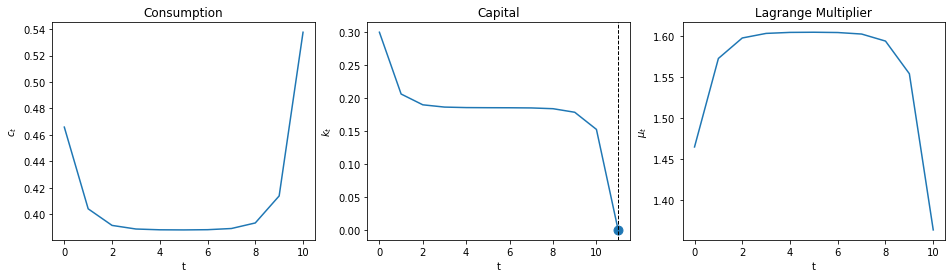

In [16]:
plot_paths(pp, 0.3, 0.3, [10]);

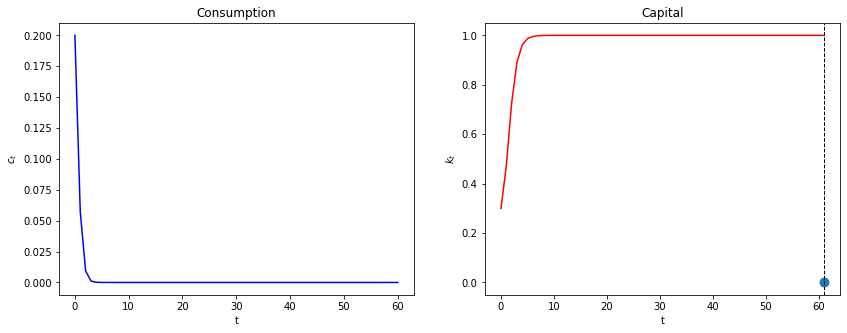

In [17]:


paths = shooting(pp, 0.2, 0.3, T=60)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

T = paths[0].size - 1
for i in range(2):
    axs[i].plot(paths[i], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

axs[1].scatter(T+1, 0, s=80)
axs[1].axvline(T+1, color='k', ls='--', lw=1)

plt.show()

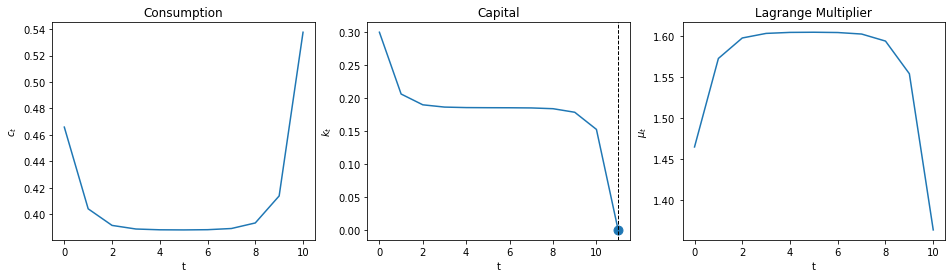

In [18]:
def bisection(pp, c0, k0, T=10, tol=1e-4, max_iter=500, k_ter=0, verbose=True):
    # initial boundaries for guess c0
    c0_upper = pp.f(k0)
    c0_lower = 0

    i = 0
    while True:
        c_vec, k_vec = shooting(pp, c0, k0, T)
        error = k_vec[-1] - k_ter

        # check if the terminal condition is satisfied
        if np.abs(error) < tol:
            if verbose:
                print('Converged successfully on iteration ', i+1)
            return c_vec, k_vec

        i += 1
        if i == max_iter:
            if verbose:
                print('Convergence failed.')
            return c_vec, k_vec

        # if iteration continues, updates boundaries and guess of c0
        if error > 0:
            c0_lower = c0
        else:
            c0_upper = c0

        c0 = (c0_lower + c0_upper) / 2
        
plot_paths(pp, 0.3, 0.3, [10]);

steady state

In [19]:
ρ = 1 / pp.β - 1
k_ss = pp.f_prime_inv(ρ+pp.δ)

print(f'steady state for capital is: {k_ss}')

steady state for capital is: 0.18546786812182883


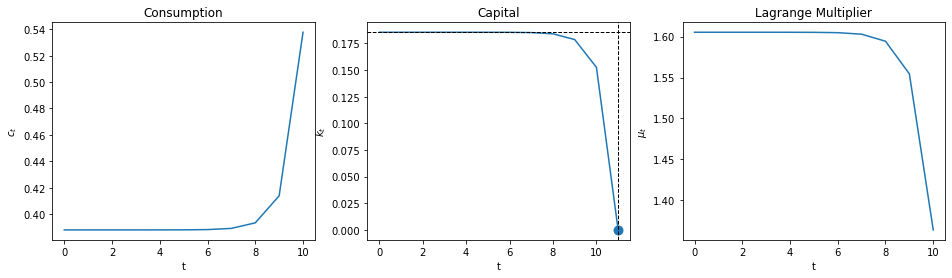

In [20]:
plot_paths(pp, 0.3, k_ss, [10], k_ss=k_ss);

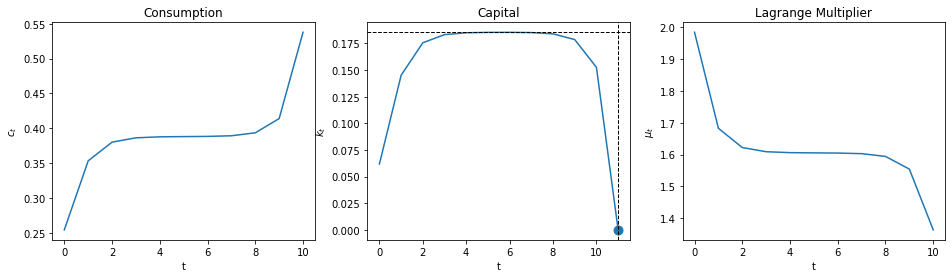

In [21]:
plot_paths(pp, 0.3, k_ss/3, [10], k_ss=k_ss);

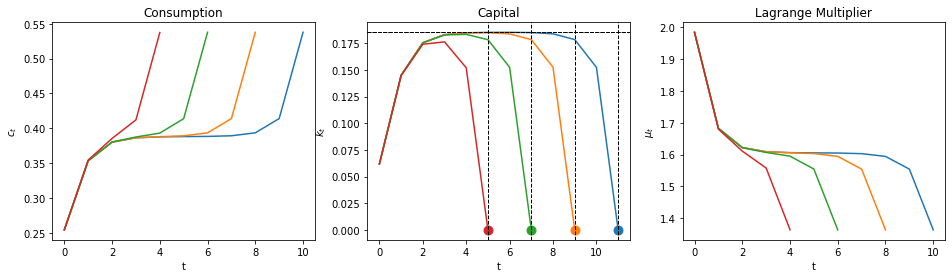

In [22]:
plot_paths(pp, 0.3, k_ss/3, [10, 8, 6, 4], k_ss=k_ss);

In [23]:
@njit
def saving_rate(pp, c_path, k_path):
    'Given paths of c and k, computes the path of saving rate.'
    production = pp.f(k_path[:-1])

    return (production - c_path) / production

In [24]:
def plot_saving_rate(pp, c0, k0, T_arr, k_ter=0, k_ss=None, s_ss=None):

    fix, axs = plt.subplots(2, 2, figsize=(12, 9))

    c_paths, k_paths = plot_paths(pp, c0, k0, T_arr, k_ter=k_ter, k_ss=k_ss, axs=axs.flatten())

    for i, T in enumerate(T_arr):
        s_path = saving_rate(pp, c_paths[i], k_paths[i])
        axs[1, 1].plot(s_path)

    axs[1, 1].set(xlabel='t', ylabel='$s_t$', title='Saving rate')

    if s_ss is not None:
        axs[1, 1].hlines(s_ss, 0, np.max(T_arr), linestyle='--')

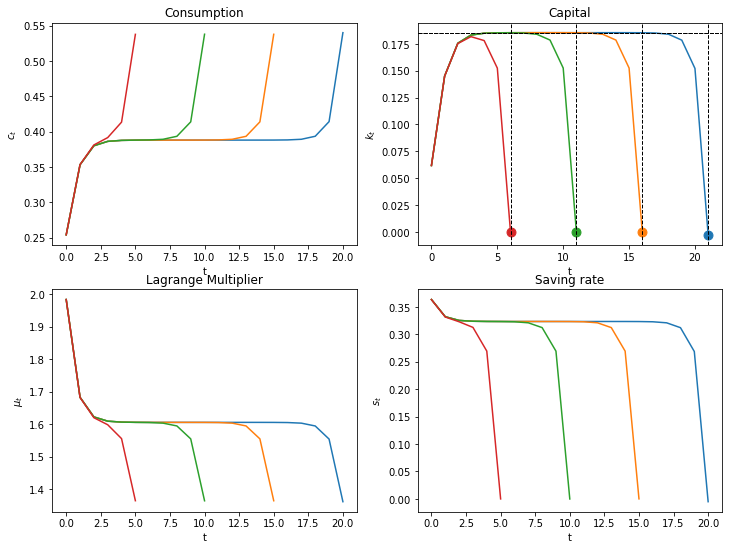

In [25]:
plot_saving_rate(pp, 0.3, k_ss/3, [20, 15, 10, 5], k_ss=k_ss)

$c)$ Obtain the steady-state version of the infinite horizon problem numerically.

We want to set $T$ = $+\infty$

The appropriate thing to do is to replace  Karush-Kuhn-Tucker conditions with

$\lim_{T\to\infty} \beta^{T} u{'} (C_T) K_{T+1} = 0$

a condition that will be satisfied by a path that converges to an optimal steady state

We can approximate the optimal path by starting from an arbitrary initial $K_o$ and shooting towards the optimal steady state $K$ at a large but finite $T+1$

In the following code, we do this for a large $T$ and plot consumption, capital, and the saving rate

We know that in the steady state that the saving rate is constant and that $\bar{s} = \frac{f(\bar{K}) - \bar{C}}{f(\bar{K})}$

from $f(\bar{K}) - \delta \bar{K} = \bar{C}$, the steady state saving rate equals :

$\bar{s} = \frac{\delta \bar{K}}{f(\bar{K})}$


The steady state saving rate $\bar{S} = \bar{s} f(\bar{K})$  is the amount required to offset capital depreciation each period.

We first study optimal capital paths that start below the steady state.

Since $K_0 < \bar{K}, f^{'}(K_0) > \rho + \delta$

The planner chooses a positive saving rate that is higher than the steady state saving rate

Note, $f^{''}(K) <0$, so as $K$ rises, $f^{'}(K)$ declines

The planner slowly lowers the saving rate until reaching a steady state in which $f^{'}(K_0) = \rho + \delta$


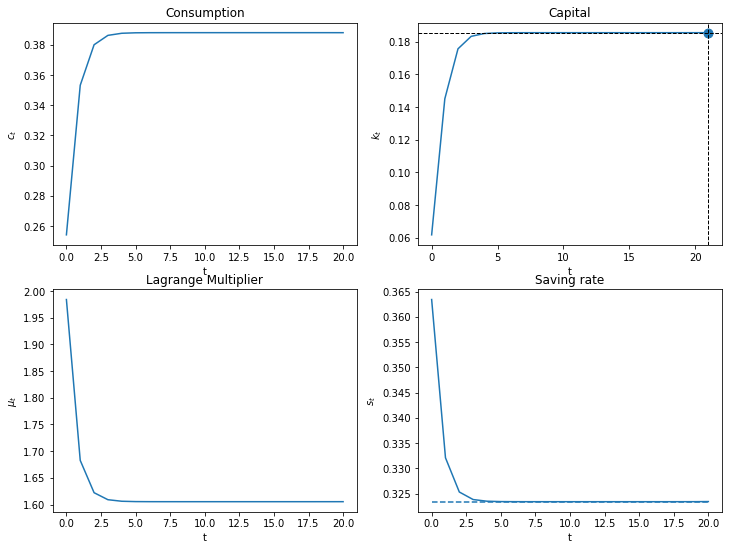

In [26]:
# steady state of saving rate
s_ss = pp.δ * k_ss / pp.f(k_ss)

plot_saving_rate(pp, 0.3, k_ss/3, [20], k_ter=k_ss, k_ss=k_ss, s_ss=s_ss)

$d)$ Check whether the solution in point $a)$ converges to the steady state capital and
the steady state saving rate.

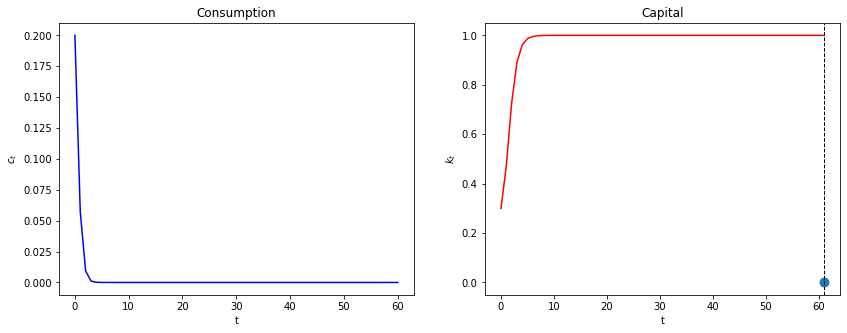

In [27]:

paths = shooting(pp, 0.2, 0.3, T=60)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

colors = ['blue', 'red']
titles = ['Consumption', 'Capital']
ylabels = ['$c_t$', '$k_t$']

T = paths[0].size - 1
for i in range(2):
    axs[i].plot(paths[i], c=colors[i])
    axs[i].set(xlabel='t', ylabel=ylabels[i], title=titles[i])

axs[1].scatter(T+1, 0, s=80)
axs[1].axvline(T+1, color='k', ls='--', lw=1)

plt.show()

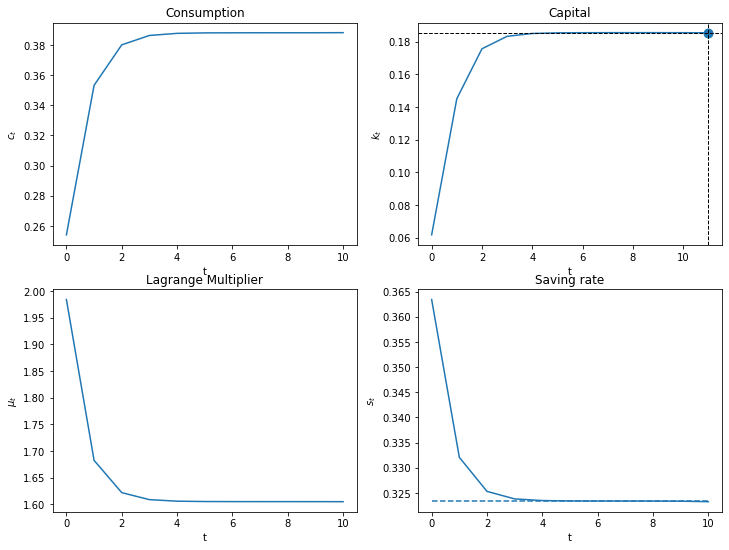

In [28]:
plot_saving_rate(pp, 0.3, k_ss/3, [10], k_ter=k_ss, k_ss=k_ss, s_ss=s_ss)